/tmp/ipython-input-1-3649074261.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_range = pd.date_range(start="2020-01-01", end="2023-12-31", freq='M')
/tmp/ipython-input-1-3649074261.py:41: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  incident_summary = iot_incidents_df.groupby(["Industry", pd.Grouper(key='Date', freq='Y')])["Incidents"].sum().reset_index()


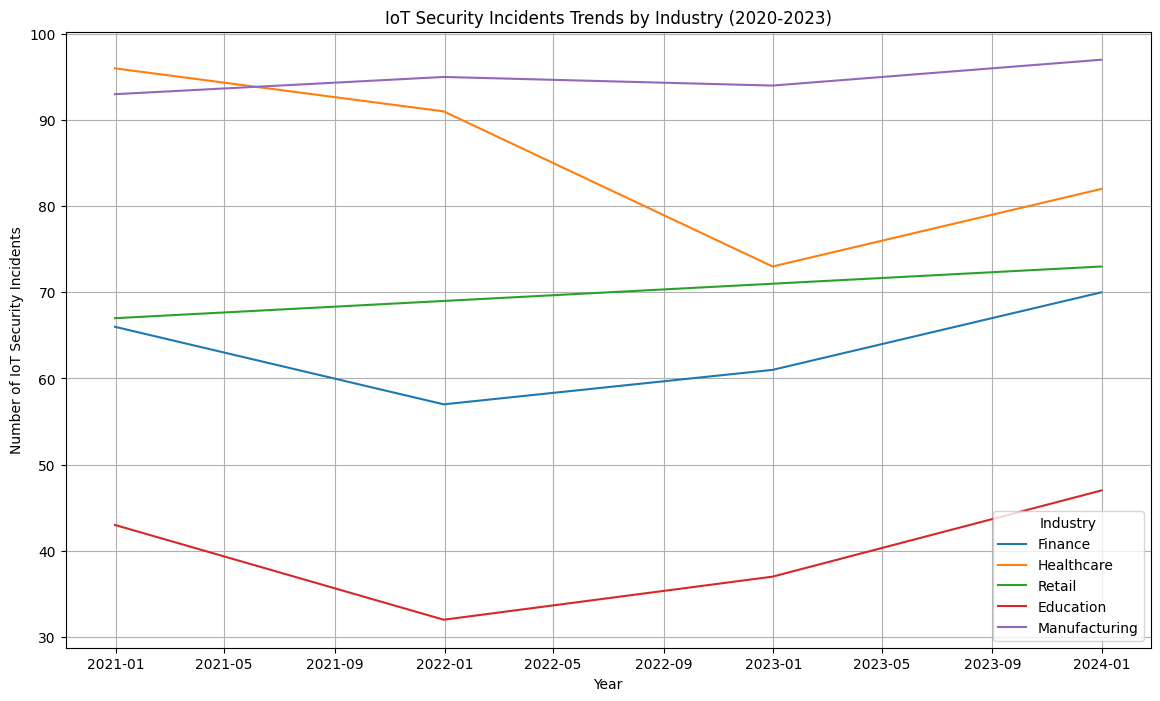

Simulated IoT Security Incidents Data:
          Date       Industry  Incidents        Attack Type
0   2020-01-31        Finance          2         Ransomware
1   2020-02-29        Finance          3         Ransomware
2   2020-03-31        Finance         10  Denial of Service
3   2020-04-30        Finance          5           Phishing
4   2020-05-31        Finance          6           Phishing
..         ...            ...        ...                ...
235 2023-08-31  Manufacturing         10           Phishing
236 2023-09-30  Manufacturing          9            Malware
237 2023-10-31  Manufacturing         10  Denial of Service
238 2023-11-30  Manufacturing         10            Malware
239 2023-12-31  Manufacturing         12            Malware

[240 rows x 4 columns]


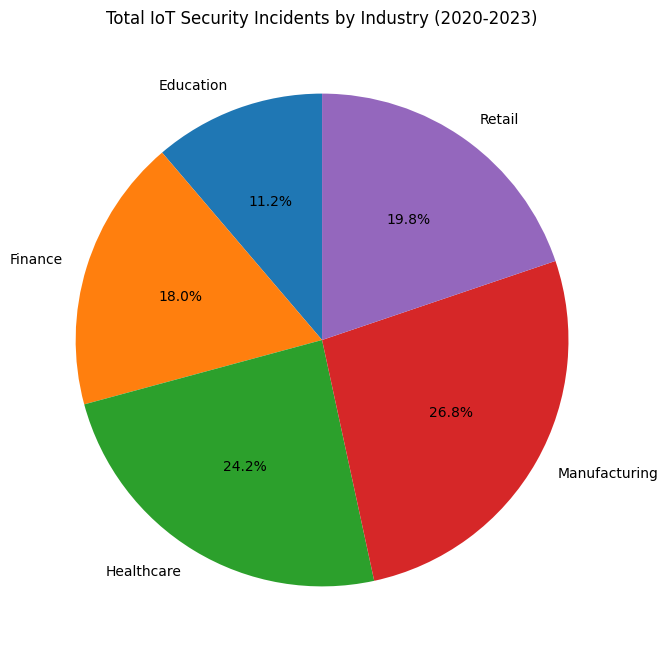

         Industry        Attack Type  Incidents
0       Education  Denial of Service         56
5         Finance            Malware         84
9      Healthcare            Malware        127
13  Manufacturing            Malware        169
17         Retail            Malware        103


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# If the file is in your Google Drive (optional usage):
file_path = '/content/drive/MyDrive/Praxis Code File/IoT Security Incidents.ipynb'

# Define industries and time range
industries = ["Finance", "Healthcare", "Retail", "Education", "Manufacturing"]
time_range = pd.date_range(start="2020-01-01", end="2023-12-31", freq='M')

# Function to simulate IoT security incidents
def simulate_iot_security_incidents():
    data = []
    for industry in industries:
        for date in time_range:
            # Simulate number of incidents with a random Poisson distribution
            # Average number of incidents varies per industry
            if industry == "Finance":
                incidents = np.random.poisson(5)
            elif industry == "Healthcare":
                incidents = np.random.poisson(7)
            elif industry == "Retail":
                incidents = np.random.poisson(6)
            elif industry == "Education":
                incidents = np.random.poisson(4)
            elif industry == "Manufacturing":
                incidents = np.random.poisson(8)

             # Simulate attack type
            attack = np.random.choice(['Denial of Service', 'Malware', 'Phishing', 'Ransomware']) # Changed 'Type of Cyber Attack' to a list of attack types

            data.append({"Date": date, "Industry": industry, "Incidents": incidents, "Attack Type": attack}) # Added "Attack Type" to the dictionary
    return pd.DataFrame(data)

# Simulate the data
iot_incidents_df = simulate_iot_security_incidents()

# Analyze incidence rates over time
incident_summary = iot_incidents_df.groupby(["Industry", pd.Grouper(key='Date', freq='Y')])["Incidents"].sum().reset_index()

# Identify trends and vulnerabilities by plotting the data
plt.figure(figsize=(14, 8))
for industry in industries:
    industry_data = incident_summary[incident_summary["Industry"] == industry]
    plt.plot(industry_data["Date"], industry_data["Incidents"], label=industry)

plt.xlabel("Year")
plt.ylabel("Number of IoT Security Incidents")
plt.title("IoT Security Incidents Trends by Industry (2020-2023)")
plt.legend(title="Industry")
plt.grid(True)
plt.show()

# Display the DataFrame with the simulated IoT security incidents data
print("Simulated IoT Security Incidents Data:")
print(iot_incidents_df)

# Create a pie chart for total incidents by industry
total_incidents_by_industry = iot_incidents_df.groupby("Industry")["Incidents"].sum()

plt.figure(figsize=(8, 8))
plt.pie(total_incidents_by_industry, labels=total_incidents_by_industry.index, autopct='%1.1f%%', startangle=90)
plt.title("Total IoT Security Incidents by Industry (2020-2023)")
plt.show()

# Analyze which attack type affected each industry the most
industry_attack_summary = iot_incidents_df.groupby(["Industry", "Attack Type"])["Incidents"].sum().reset_index() # Changed "Type of Cyber Attack" to "Attack Type"

# Find the most frequent attack type for each industry
most_frequent_attack_per_industry = industry_attack_summary.loc[industry_attack_summary.groupby("Industry")["Incidents"].idxmax()]

# Display the most frequent attack type per industry
# tools.display_dataframe_to_user(name="Most Frequent Attack Type per Industry", dataframe=most_frequent_attack_per_industry) # Assuming tools.display_dataframe_to_user is a custom function - comment out if not available

print(most_frequent_attack_per_industry)

# Display a pie chart showing which attack affected









This code performs the following steps:

Defines a set of industries and a time range from January 2020 to December 2023.
Simulates IoT security incidents using a Poisson distribution, where the average number of incidents varies per industry.
Aggregates the simulated data by year and industry.
Plots the trends of IoT security incidents for each industry.
Displays the DataFrame with the simulated IoT security incidents data.